In [1]:
import sklearn
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder #brukes ikke lenger/enda
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 500
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_table('agaricus-lepiota.csv', delimiter=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
column_labels = [
    'class', 'cap shape', 'cap surface', 'cap color', 'bruised', 'odor',
    'gill attachment', 'gill spacing', 'gill size', 'gill color', 
    'stalk shape', 'stalk root', 'stalk surface above ring',
    'stalk surface below ring', 'stalk color above ring',
    'stalk color below ring', 'veil type', 'veil color', 'ring number',
    'ring type', 'spore print color', 'population', 'habitat'
]

df.columns = column_labels

In [4]:
df.head()

,class,cap shape,cap surface,cap color,bruised,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above ring,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
df['class'].replace(['e', 'p'], [0, 1], inplace=True)
df['stalk root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk root, dtype: int64

In [6]:
df['veil type'].value_counts()

p    8124
Name: veil type, dtype: int64

None of the samples have a veil type other than 'p', therefore we could remove this column.

As a very large percentage of the samples have the value '?' in the stalk root-column, it would be unwise to drop all of these samples. Instead, we have chosen to replace '?' woth 'unknown'. As we will use one-hot encoding on each of the features, having an unknown stalk root can be considered as a feature that can be used for prediction.

In [7]:
df['stalk root'].replace('?', 'unknown', inplace=True)

In [8]:
for column in df.columns.drop(["class"]):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop([column], axis=1, inplace=True)

In [9]:
df.head()

,class,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,cap color_b,cap color_c,cap color_e,cap color_g,cap color_n,cap color_p,cap color_r,cap color_u,cap color_w,cap color_y,bruised_f,bruised_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill attachment_a,gill attachment_f,gill spacing_c,gill spacing_w,gill size_b,gill size_n,gill color_b,gill color_e,gill color_g,gill color_h,gill color_k,gill color_n,gill color_o,gill color_p,gill color_r,gill color_u,gill color_w,gill color_y,stalk shape_e,stalk shape_t,stalk root_b,stalk root_c,stalk root_e,stalk root_r,stalk root_unknown,stalk surface above ring_f,stalk surface above ring_k,stalk surface above ring_s,stalk surface above ring_y,stalk surface below ring_f,stalk surface below ring_k,stalk surface below ring_s,stalk surface below ring_y,stalk color above ring_b,stalk color above ring_c,stalk color above ring_e,stalk color above ring_g,stalk color above ring_n,stalk color above ring_o,stalk color above ring_p,stalk color above ring_w,stalk color above ring_y,stalk color below ring_b,stalk color below ring_c,stalk color below ring_e,stalk color below ring_g,stalk color below ring_n,stalk color below ring_o,stalk color below ring_p,stalk color below ring_w,stalk color below ring_y,veil type_p,veil color_n,veil color_o,veil color_w,veil color_y,ring number_n,ring number_o,ring number_t,ring type_e,ring type_f,ring type_l,ring type_n,ring type_p,spore print color_b,spore print color_h,spore print color_k,spore print color_n,spore print color_o,spore print color_r,spore print color_u,spore print color_w,spore print color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
target = df["class"]
data = df.drop("class", axis=1)
print(target.shape)
print(data.shape)
data.head()
# df.describe()

(8124,)
(8124, 117)


,cap shape_b,cap shape_c,cap shape_f,cap shape_k,cap shape_s,cap shape_x,cap surface_f,cap surface_g,cap surface_s,cap surface_y,cap color_b,cap color_c,cap color_e,cap color_g,cap color_n,cap color_p,cap color_r,cap color_u,cap color_w,cap color_y,bruised_f,bruised_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill attachment_a,gill attachment_f,gill spacing_c,gill spacing_w,gill size_b,gill size_n,gill color_b,gill color_e,gill color_g,gill color_h,gill color_k,gill color_n,gill color_o,gill color_p,gill color_r,gill color_u,gill color_w,gill color_y,stalk shape_e,stalk shape_t,stalk root_b,stalk root_c,stalk root_e,stalk root_r,stalk root_unknown,stalk surface above ring_f,stalk surface above ring_k,stalk surface above ring_s,stalk surface above ring_y,stalk surface below ring_f,stalk surface below ring_k,stalk surface below ring_s,stalk surface below ring_y,stalk color above ring_b,stalk color above ring_c,stalk color above ring_e,stalk color above ring_g,stalk color above ring_n,stalk color above ring_o,stalk color above ring_p,stalk color above ring_w,stalk color above ring_y,stalk color below ring_b,stalk color below ring_c,stalk color below ring_e,stalk color below ring_g,stalk color below ring_n,stalk color below ring_o,stalk color below ring_p,stalk color below ring_w,stalk color below ring_y,veil type_p,veil color_n,veil color_o,veil color_w,veil color_y,ring number_n,ring number_o,ring number_t,ring type_e,ring type_f,ring type_l,ring type_n,ring type_p,spore print color_b,spore print color_h,spore print color_k,spore print color_n,spore print color_o,spore print color_r,spore print color_u,spore print color_w,spore print color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
X_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(x_test)
score = knn.score(x_test, y_test)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)
print(f"KNeighbor: {score}")


/home/yarkin/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighbor: 1.0


/home/yarkin/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print(f"Logistic Regression: {log_model.score(x_test, y_test)}")

Logistic Regression: 1.0


In [13]:
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))
nn_model.fit(X_train, y_train)
print(f"Neural Network: {nn_model.score(x_test, y_test)}")

Neural Network: 1.0


In [14]:
corr = df.corr()

corr = pd.DataFrame(corr["class"])
corr.sort_values(by=['class'], ascending=False)

,class
class,1.000000
odor_f,0.623842
stalk surface above ring_k,0.587658
stalk surface below ring_k,0.573524
gill size_n,0.540024
gill color_b,0.538808
bruised_f,0.501530
spore print color_h,0.490229
ring type_l,0.451619
population_v,0.443722


<AxesSubplot:>

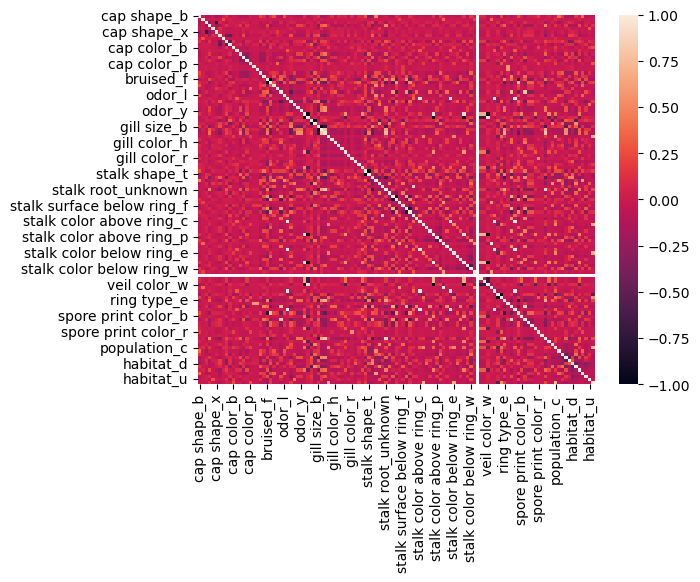

In [15]:
corr = data.corr()

sns.heatmap(corr)

^denne er kanskje litt ubrukelig, men jeg aner ikke hvordan jeg skal bruke noe visuell presentasjon når det kommer til korrelasjon